In [5]:
using DataFrames
using Printf
using CSV
using Dates
using DayCounts
# using Revise
using FileIO
using VegaLite, VegaDatasets

main_path = "/home/artur/BondPricing/bond-data"
module_path = string(main_path, "/module")
script_path = string(main_path, "/data-scripts/plots")
include(string(joinpath(module_path, "data_module"), ".jl"))
include(string(joinpath(module_path, "stats_module"), ".jl"))
include(string(joinpath(module_path, "plot_module"), ".jl"))
ENV["LINES"] = 100
ENV["COLUMNS"] = 1000

1000

In [6]:
dto = DataMod.data_obj_constructor()

Main.DataMod.data_obj("/home/artur/BondPricing/bond-data", "data", "MERGED", "Stats", "merged", Main.DataMod.trace_obj("TRACE", "/home/artur/BondPricing/bond-data/data/TRACE", "raw", "pre-processed", "processed", "filtered", "trace_enhanced", "cancel_trd", "reverse_trd", "original_trd", "processed", "filtered", ["cusip_id", "entrd_vol_qt", "rptd_pr", "trd_exctn_dt", "trd_exctn_tm", "trc_st", "rpt_side_cd", "cntra_mp_id", "msg_seq_nb"], ["cusip_id", "entrd_vol_qt", "rptd_pr", "trd_exctn_dt", "trd_exctn_tm", "trc_st", "rpt_side_cd", "cntra_mp_id", "orig_msg_seq_nb"], Dict{String,DataType}("yld_sign_cd" => String,"first_trade_ctrl_num" => Int64,"sale_cndtn2_cd" => String,"yld_pt" => Float64,"asof_cd" => String,"sell_cmsn_rt" => Float64,"trd_exctn_tm" => String,"sale_cndtn_cd" => String,"days_to_sttl_ct" => String,"rptd_pr" => Float64…)), Main.DataMod.mergent_obj("MERGENT", "/home/artur/BondPricing/bond-data/data/MERGENT", "mergent_fisd", "filtered", Dict(:COUPON_INFO => [:ISSUE_ID, :DATED

In [11]:
yr = 2019
qtr=2

include(string(joinpath(module_path, "stats_module"), ".jl"))
snc = StatsMod.load_stats_data(dto, yr, qtr; stats_by_num_cov=true)
scc = StatsMod.load_stats_data(dto, yr, qtr; stats_by_num_cov=false)

first(scc, 5)

 
Filename: 2019Q2_stats_by_num_cov.csv
 
Reading dataframe in folder: /home/artur/BondPricing/bond-data/data/Stats/2019...
 
Filename: 2019Q2_stats_by_cov_cat.csv
 
Reading dataframe in folder: /home/artur/BondPricing/bond-data/data/Stats/2019...


,trd_exctn_yr,trd_exctn_qtr,otc,hy,ig,ats,cov,ncov,total_trd_count,total_bonds,total_issuers,qt25_trd_vol,mean_trd_vol,median_trd_vol,qt75_trd_vol,total_trd_vol_tr,cg1_mean_trd_vol,cg2_mean_trd_vol,cg3_mean_trd_vol,cg4_mean_trd_vol,cg5_mean_trd_vol,cg6_mean_trd_vol,cg7_mean_trd_vol,cg8_mean_trd_vol,cg9_mean_trd_vol,cg10_mean_trd_vol,cg11_mean_trd_vol,cg12_mean_trd_vol,cg13_mean_trd_vol,cg14_mean_trd_vol,cg15_mean_trd_vol,cg1_median_trd_vol,cg2_median_trd_vol,cg3_median_trd_vol,cg4_median_trd_vol,cg5_median_trd_vol,cg6_median_trd_vol,cg7_median_trd_vol,cg8_median_trd_vol,cg9_median_trd_vol,cg10_median_trd_vol,cg11_median_trd_vol,cg12_median_trd_vol,cg13_median_trd_vol,cg14_median_trd_vol,cg15_median_trd_vol,cg1_trd_vol_tr,cg2_trd_vol_tr,cg3_trd_vol_tr,cg4_trd_vol_tr,cg5_trd_vol_tr,cg6_trd_vol_tr,cg7_trd_vol_tr,cg8_trd_vol_tr,cg9_trd_vol_tr,cg10_trd_vol_tr,cg11_trd_vol_tr,cg12_trd_vol_tr,cg13_trd_vol_tr,cg14_trd_vol_tr
,Int64,Float64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2019,2.0,0,0,0,0,0,0,2760879,8679,2012,10000.0,4.43138e5,25000.0,150000.0,1223.45,28335.5,3.4181e5,2032.56,8081.42,305.753,2.68352e5,431096.0,179758.0,17279.6,5222.53,3.66723e5,1.85804e5,3.42402e5,33029.7,3.39191e5,0.0,17000.0,0.0,0.0,0.0,8000.0,25000.0,0.0,0.0,0.0,20000.0,0.0,15000.0,0.0,15000.0,78.2308,943.695,5.61167,22.3118,0.844147,740.888,1190.2,496.29,47.7069,14.4188,1012.48,512.984,945.33,91.1911
2,2019,2.0,0,0,0,0,0,1,94837,459,220,10000.0,350554.0,25000.0,105000.0,33.2455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019,2.0,0,0,0,0,1,0,2666042,8220,1937,10000.0,446431.0,25000.0,150000.0,1190.2,29343.4,3.53969e5,2104.87,8368.9,316.629,277898.0,446431.0,1.86152e5,17894.3,5408.31,379768.0,1.92414e5,3.54582e5,34204.7,3.51256e5,0.0,20000.0,0.0,0.0,0.0,10000.0,25000.0,0.0,0.0,0.0,20000.0,0.0,18000.0,0.0,16000.0,78.2308,943.695,5.61167,22.3118,0.844147,740.888,1190.2,496.29,47.7069,14.4188,1012.48,512.984,945.33,91.1911
4,2019,2.0,0,1,0,0,0,0,763973,1952,876,10000.0,4.20744e5,25000.0,151000.0,321.437,85719.4,3.12114e5,1333.11,2695.89,670.647,3.12714e5,4.17131e5,1.6254e5,55419.6,9563.03,3.79538e5,2.73063e5,358680.0,1.03521e5,3.5854e5,0.0,18000.0,0.0,0.0,0.0,15000.0,25000.0,0.0,0.0,0.0,20000.0,10000.0,20000.0,0.0,20000.0,65.4873,238.446,1.01846,2.05959,0.512356,238.905,318.677,124.176,42.3391,7.3059,289.957,208.613,274.022,79.0875
5,2019,2.0,0,1,0,0,0,1,5769,66,34,10000.0,4.78545e5,35000.0,200000.0,2.76073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
snc

,trd_exctn_yr,trd_exctn_qtr,sbm,rt,median_num_cov,mean_num_cov,sum_num_cov,mean_vol_by_num_cov,median_vol_by_num_cov,total_vol_by_num_cov,trades_by_num_cov,bonds_by_num_cov,issuers_by_num_cov
,Int64,Float64,Symbol,Symbol,Float64,Float64,Int64,Float64,Float64,Float64,Int64,Int64,Int64
1,2019,2.0,any,any,5.0,4.68962,0,3.86077e5,25000.0,310.029,803023,11284,624
2,2019,2.0,any,any,5.0,4.68962,1,4.53358e5,40000.0,0.979254,2160,20,14
3,2019,2.0,any,any,5.0,4.68962,2,5.24264e5,35000.0,63.3725,120879,416,193
4,2019,2.0,any,any,5.0,4.68962,3,5.50453e5,36000.0,119.016,216214,643,318
5,2019,2.0,any,any,5.0,4.68962,4,4.57628e5,29000.0,88.2801,192908,768,342
6,2019,2.0,any,any,5.0,4.68962,5,4.69056e5,29000.0,211.749,451436,1560,572
7,2019,2.0,any,any,5.0,4.68962,6,4.64675e5,28000.0,220.754,475072,1529,539
8,2019,2.0,any,any,5.0,4.68962,7,4.16307e5,25000.0,221.014,530891,1597,527
9,2019,2.0,any,any,5.0,4.68962,8,3.88016e5,25000.0,187.857,484147,1229,424


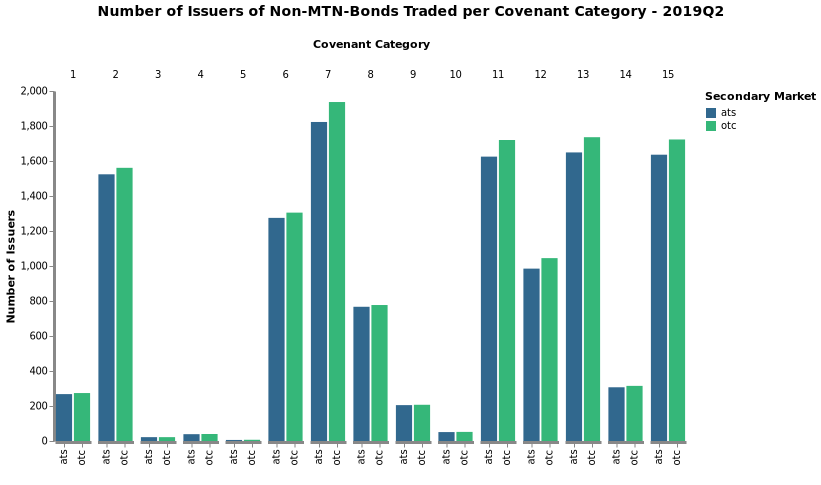

In [10]:
scripts_path = string(main_path, "/data-scripts/plots")
plt_dir = "plots"

color_scale="viridis"
cal_formula=""
cal_var=""
col_var="cov_cat"
col_var_type="ordinal"
col_title="Covenant Category"
col_sort="ascending"
x_var="sbm:n"
x_var_type="nominal"
x_axis_title=" "
width_step=18
legend_title="Secondary Market"
spacing=4.5
height=350
save_plt= false
plt_type = "cov_cat"
file_ext="png"
# }}}
pl = [ ]

# Issuers per Covenant Category {{{1
stats_var=:issuers
tt = PlotMod.prepare_cat_plot(scc; stat=stats_var)

## Issuer Count
y_var="value"
y_axis_title="Number of Issuers"
title=[string("Number of Issuers of Non-MTN-Bonds Traded per Covenant Category")]
if :period in Symbol.(names(tt))
    title[end] = string(title[end], " - ", tt[1, :period])
end

include(string(scripts_path, "/", "single_vega_plt_script.jl"))

In [24]:
df

,period,sbm,rt,sum_num_cov,variable,value,perc_sbm_total,perc_sbm_rt_total
,Symbol,Symbol,Symbol,Int64,Cat…,Int64,Float64,Float64
1,2019Q2,any,any,0,trades_by_num_cov,94837,3.43503,3.43503
2,2019Q2,any,any,1,trades_by_num_cov,2160,0.078236,0.078236
3,2019Q2,any,any,2,trades_by_num_cov,120755,4.37379,4.37379
4,2019Q2,any,any,3,trades_by_num_cov,211699,7.66781,7.66781
5,2019Q2,any,any,4,trades_by_num_cov,191240,6.92678,6.92678
6,2019Q2,any,any,5,trades_by_num_cov,451238,16.344,16.344
7,2019Q2,any,any,6,trades_by_num_cov,475062,17.2069,17.2069
8,2019Q2,any,any,7,trades_by_num_cov,530891,19.2291,19.2291
9,2019Q2,any,any,8,trades_by_num_cov,484147,17.536,17.536


In [22]:
stats_var=:count
df = PlotMod.prepare_num_cov_plot(snc; stat=stats_var)

# Trade Count {{{2
color_scale="viridis"

cond = .&(df[:, :sbm] .!= :any, df[:, :rt] .== :any)
tt = df[cond, :]

x_var="sbm:n"
x_var_type="nominal"
legend_title="Secondary Market"

y_var="value"
y_axis_title="Trade Count"
title=["Number of Trades of Non-MTN-Bonds Traded",
        " by Number of Covenant Categories per Bond"]
if :period in Symbol.(names(tt))
    title[end] = string(title[end], " - ", tt[1, :period])
end

include(string(scripts_path, "/", "single_vega_plt_script.jl"))
push!(pl, p)

13-element Array{Any,1}:
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec

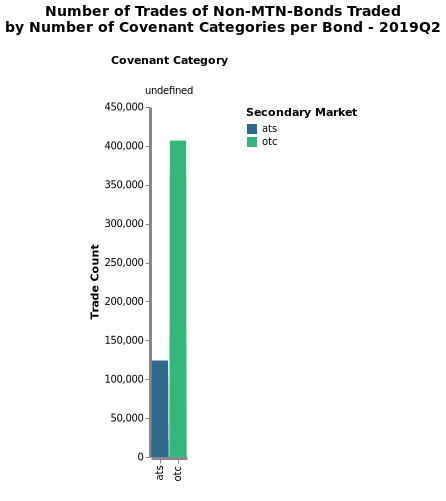

In [23]:
pl[13]

In [53]:
using VegaLite

In [44]:
domainWidth=3
opacity=.7

0.7

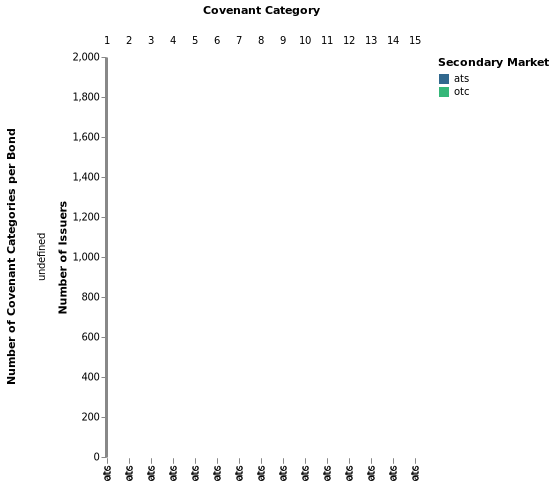

In [54]:
p = tt |> @vlplot(:bar,
                  column={col_var, type=col_var_type, 
                          title=col_title, sort=col_sort},
                  y={y_var, axis={title=y_axis_title, grid=false, stack=nothing}},
                  x={x_var, type=x_var_type, axis={title=x_axis_title}},
                  color={x_var, legend={title=legend_title}, scale={scheme=color_scale}},
                  config={
                      view={stroke=:transparent},
                      axis={domainWidth=domainWidth},
                      opacity={value=opacity},
                  },
                  row={row_var, type=row_var_type, header={title=row_var_title}},
#                   title={text=title, 
#                          align=title_alignment, 
#                          anchor=title_anchor, 
#                          fontSize=title_font_size, 
#                          offset=title_offset},
#                   spacing=spacing,
                  width={step=width_step},
                  height=height
                ) 
    


In [5]:
# Common Parameters {{{1
col_var="sum_num_cov"
col_var_type="ordinal"
col_title="Number of Covenant Categories per Bond"
col_sort="ascending"
x_var="sbm:n"
x_var_type="nominal"
x_axis_title=" "
width_step=18
legend_title="Secondary Market"
spacing=1
height=250
save_plt=true
plt_type = "num_cov"
file_ext="png"
#
save_plt=false
scripts_path = string(main_path, "/data-scripts")
plt_dir = "plots"

"plots"

In [47]:
include(string(joinpath(scripts_path, "plot_cov_cat"), ".jl"))
pl

 
Filename: 2019Q2_stats_by_cov_cat.csv
 
Reading dataframe in folder: /home/artur/BondPricing/bond-data/data/Stats/2019...


12-element Array{Any,1}:
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec

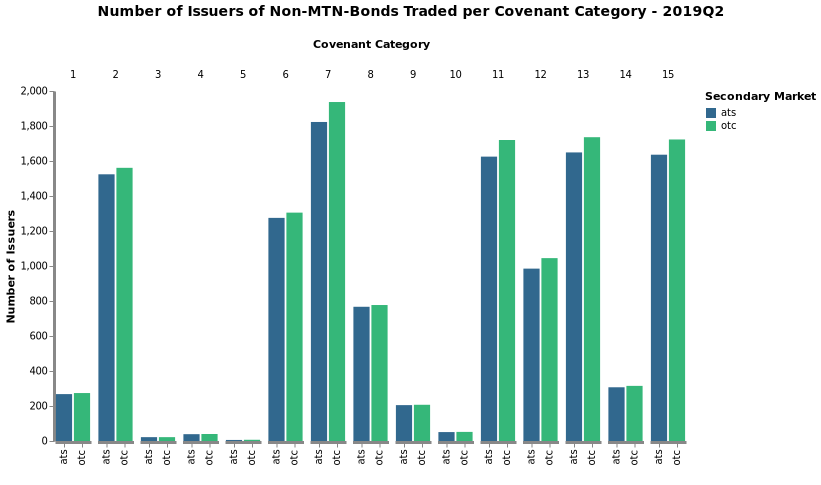

In [48]:
pl[1]

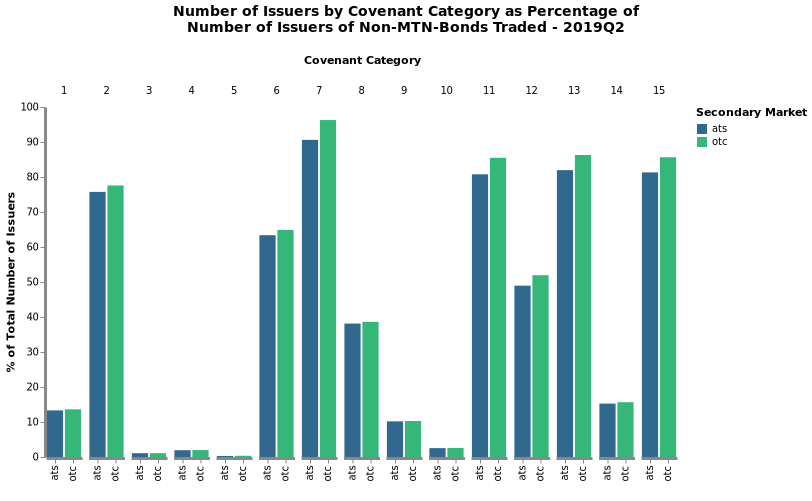

In [49]:
pl[2]

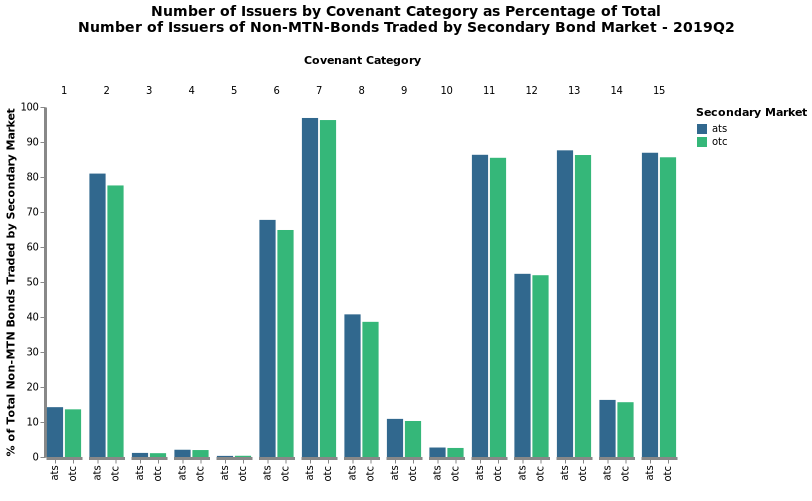

In [50]:
pl[3]

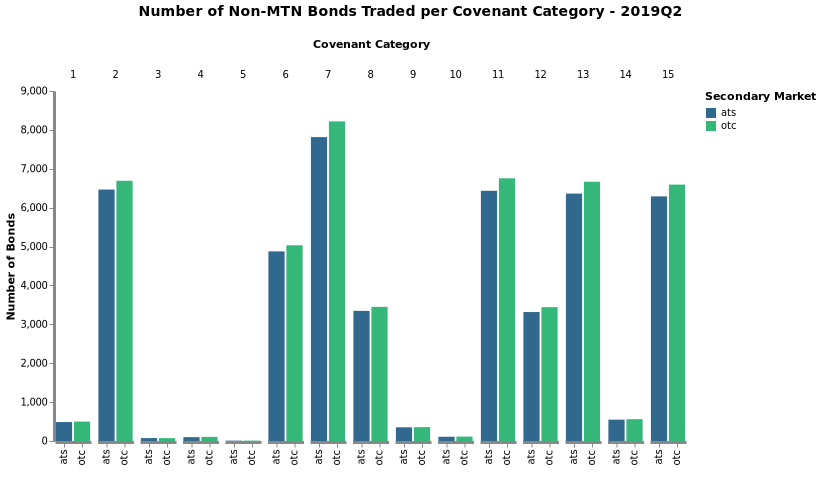

In [52]:
pl[4]

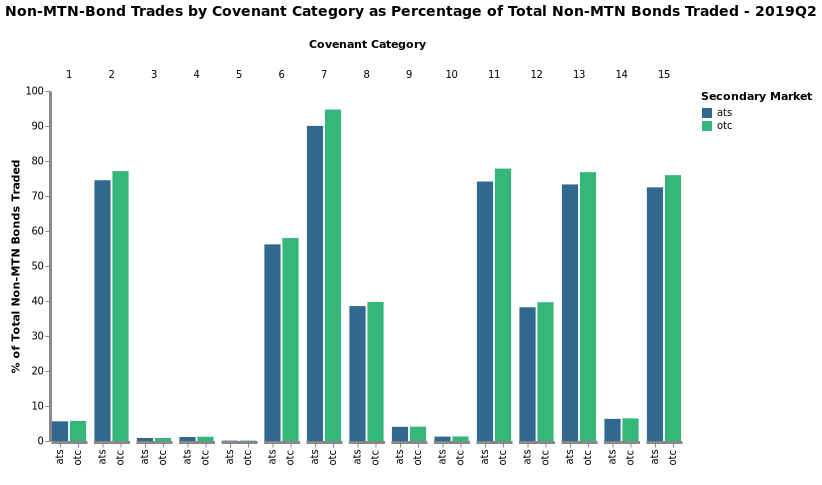

In [53]:
pl[5]

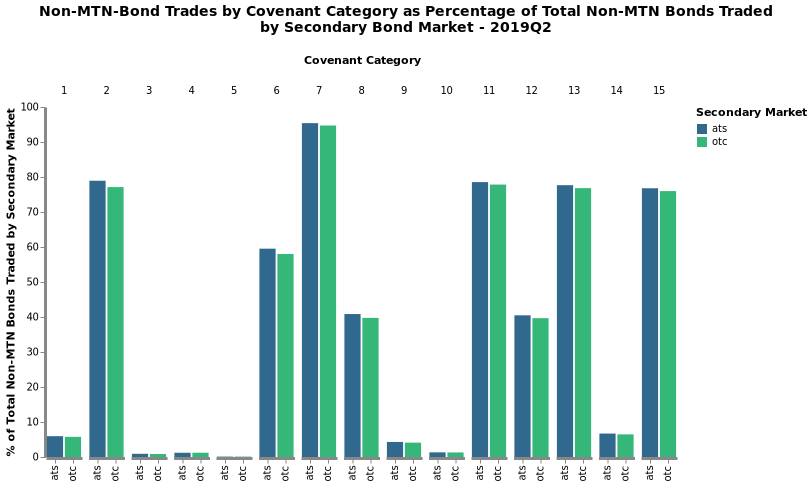

In [54]:
pl[6]

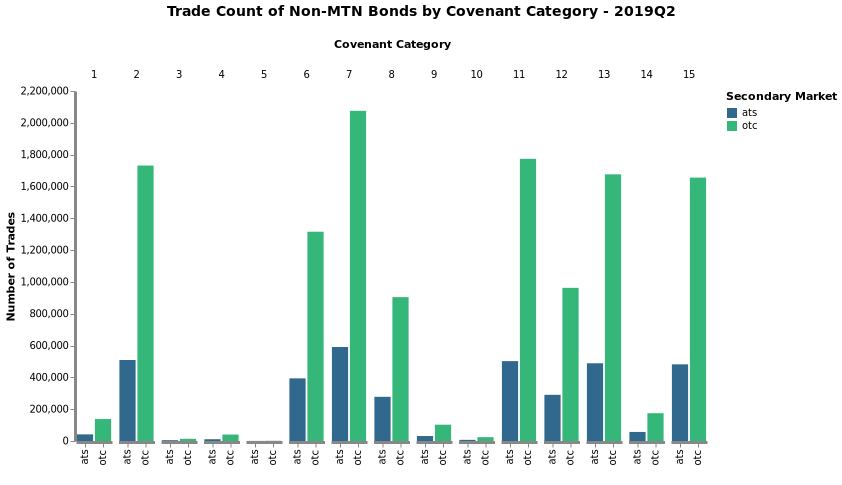

In [55]:
pl[7]

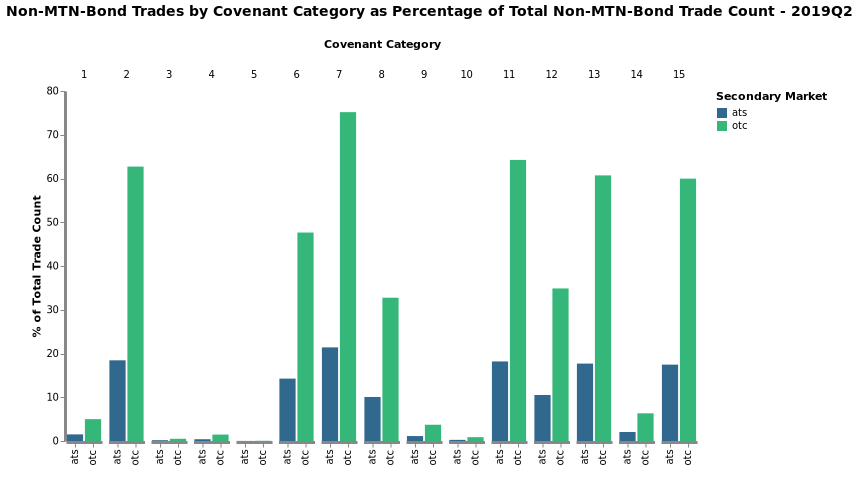

In [56]:
pl[8]

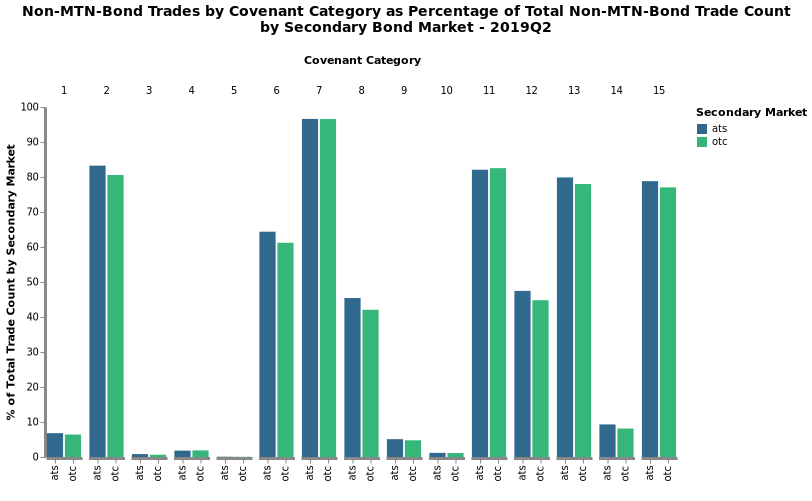

In [57]:
pl[9]

In [9]:
scripts_path = string(main_path, "/data-scripts/plots")
include(string(joinpath(scripts_path, "plot_num_covs"), ".jl"))
pl

 
Filename: 2019Q2_stats_by_num_cov.csv
 
Reading dataframe in folder: /home/artur/BondPricing/bond-data/data/Stats/2019...


24-element Array{Any,1}:
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec

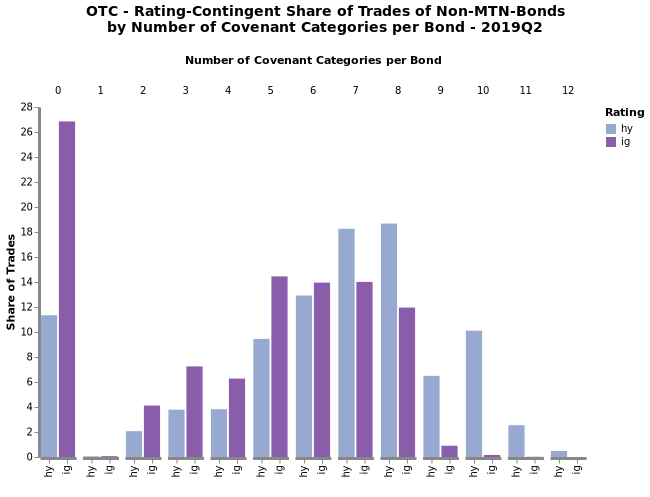

In [10]:
pl[10]

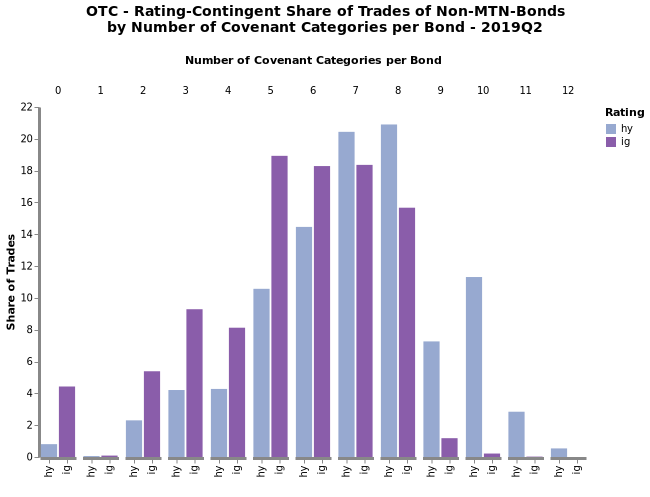

In [44]:
pl[10]

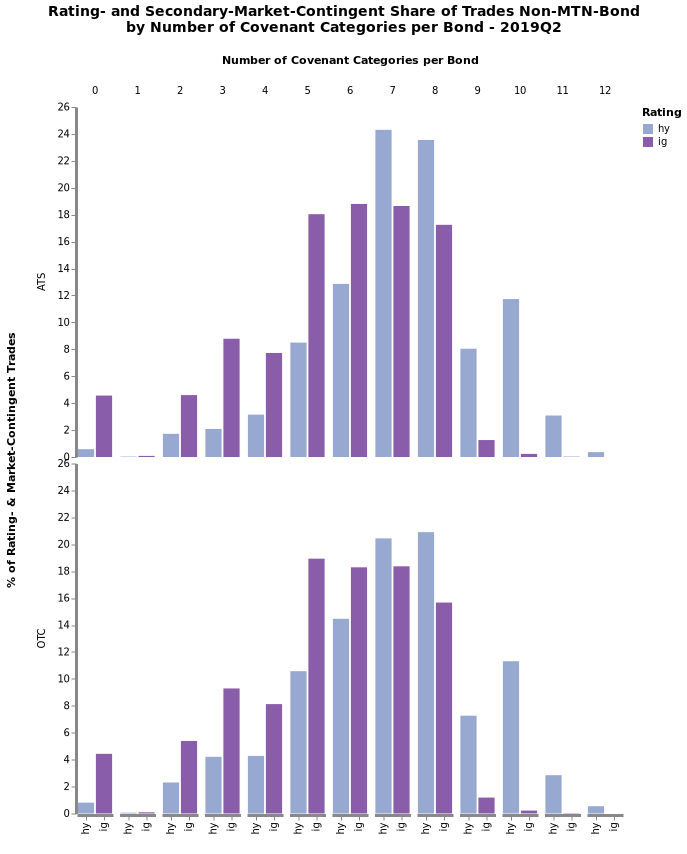

In [45]:
pl[11]

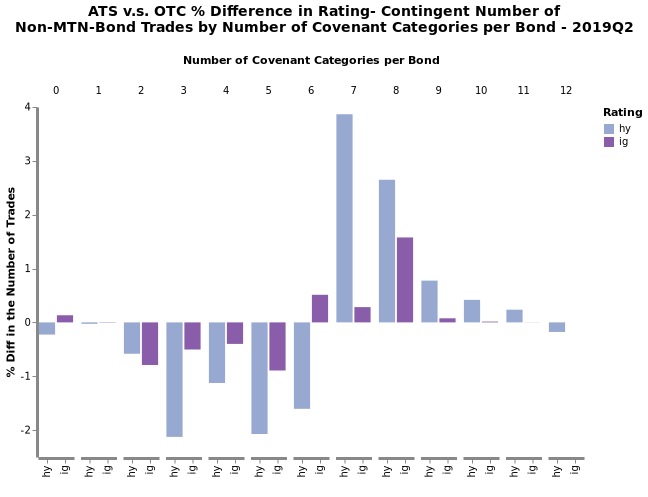

In [46]:
pl[12]